# 1. 인공 신경망

## 1) 패션 MINIST 데이터 셋 로드 
- `keras`를 이용해 데이터 로드
- `load_data`를 이용해 데이터를 임포트 

In [2]:
import keras
(train_input,train_target), (test_input,test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


- 데이터 크기 확인
    - 훈련 데이터 6만 개 
    - 테스트 데이터 1만 개

In [5]:
### 데이터 크기 확인
print("훈련 데이터 : ",train_input.shape, train_target.shape)
print("테스트 데이터 : ",test_input.shape, test_target.shape)

훈련 데이터 :  (60000, 28, 28) (60000,)
테스트 데이터 :  (10000, 28, 28) (10000,)


- 이미지 데이터 확인

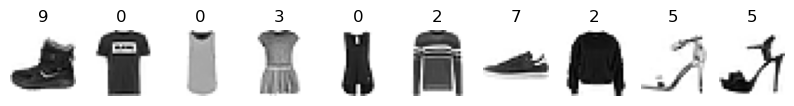

In [ ]:
import matplotlib.pyplot as plt
### 10개  이지미를 출력
fig, axes = plt.subplots(1, 10, figsize=(10, 10))

for i in range(10):
    ### 이미지를 출력
    axes[i].imshow(train_input[i], cmap='gray_r')
    ### 테이블의 타겟 출력 
    axes[i].set_title(train_target[i])
    axes[i].axis('off')  # 축 제거
plt.show()

In [8]:
print(train_target[:10])  

[9 0 0 3 0 2 7 2 5 5]


- 데이터의 유니크 값 및 개수 확인

In [11]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 2) 로지스틱 회귀로 패션 아이템 구분 하기
- 데이터 수가 6만 개 -> 모든 데이터를 이용해서 학습하는 것보다 SGDClassifier를 이용
- 데이터 전처리 
  - MINIST 데이터 : 0~255 사이의 값
  - 이 데이터를 표준화 해서 사용 
  -> SGD는 여러 특성중에서 기울기가 가장 가파른 방향으로 이동 하기 때문

  ### 데이터 전처리
  - 2차원 데이터 -> 1차원 데이터로 변환
  - 28*28 = 784 개로 변환

In [12]:
### 0~255 사이 점수를 0~1 사이로 변경
train_scaled = train_input / 255.0

### 28x28 크기의 이미지를 1차원으로 변경
train_scaled = train_scaled.reshape(-1, 28 * 28)

### 크기 확인
print("데이터 확인 : ",train_scaled.shape)

데이터 확인 :  (60000, 784)


### SGD + 교차 검증 진행 
- SGD :
  - `log_loss` : 로지스틱 손실함수 사용
  - `max_iter` : 반복 횟 수 
  - `max_iter`를 늘려도 크기 개선되지 않음

In [15]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

### SGDClassifier 모델 생성
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
### 교차 검증을 통해 모델 평가
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print("교차 검증 점수 : ", scores['test_score'])

교차 검증 점수 :  [0.83       0.81991667 0.82008333 0.80766667 0.81958333]


- SGD로 표현하면 784개의 특성을 가진 방정식으로 치환 
- 각 레이블 마다 784개의 특성을 가진 방정식이 생김 

## 3) 인공신경망
- 기본적인 인공신경망은 SGD을 사용하는 로지스틱 회귀와 유사 

### 기본 용어
- 출력층 : 신경망의 최종 값을 만드는 층 $z_1~z_10$ 
- 뉴런 : 인경신경망에서 z값을 계산하는 단위 
- 유닛 : 뉴런이란 표현 대신에 (뉴런은 선형만 표현해서)
- 입력층 : 각 특성들 $x_1 ~ x_784$
  - 입력층은 출력층 그 자체 = 특별한 계산을 수행하지 않음 

### 매컬러-피츠 뉴런 
- 생물학적인 뉴런은 자극 > 수상돌기 > 세포체 > 축삭돌기 
- 인공지능의 뉴런도 값 > 입력층 > 은닉층 > 출력층
- 단 생물학적 뉴런은 ==가중치*입력값==을 하지 않음 
- 딥러닝은 수학적으로 뉴런의 행동을 따라한 것임 


### TensorFlow와 Keras
### TebsorFlow
- 구글에서 개발한 오픈소스 머신러닝 프레임워크

In [16]:
import tensorflow as tf

#### Keras
- 텐서플로우의 고수준 API와 동일 
- 프랑소와 숄레가 만든 딥러닝 라이브러리
- 케라스는 직접 GPU 연산을 사용하지 않는 대신다른 라이브러리를 백엔드로 사용함 
  - 텐서플로우, 씨아노, CNTK와 같은 여러 딥러인 라이브러리를 백엔드로 사용 
  - 멀티-백엔드 케라스라고 부름 
  - 3.0 버전 부터는 텐서플로, 파이토치, 백스만 백엔드로 사용 

In [17]:
### 케라스 백앤드 출력 
print("케라스 백앤드 : ", tf.keras.backend.backend())

케라스 백앤드 :  tensorflow


In [18]:
### 백앤드 변경 
#import os 
#os.environ['KERAS_BACKEND'] = 'touch; 

## 4) 인공 신경망 모델 만들기
- 인공 신경망은 교차검증을 잘 사용하지 않음 
  - 대신, 검증 세트를 별도로 덜어냄 
- 이유 1 : 딥러닝은 데이터셋이 큼 -> 점수가 안정적임 
- 이유 2: 교차검증은 훈련 시간이 김 

In [21]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2,random_state=42)

### 검증 데이터는 20%로 설정 
print("훈련 데이터 크기 : ", train_scaled.shape, train_target.shape)
print("검증 데이터 크기 : ", val_scaled.shape, val_target.shape)

훈련 데이터 크기 :  (27000, 784) (27000,)
검증 데이터 크기 :  (6750, 784) (6750,)


- 입력층은 별다른 연산을 수항해지 않음 
    - 하지만 신경망 알고리즘은 입력의 크기에 따라 모델의 가중치가 결정됨
    - 입력층 정의 방법 `keras.Input(shape=())`
  
###  입력층 생성

In [22]:
inputs = keras.layers.Input(shape=(784,))  # 입력 레이어

### 밀집층 생성
- 밀집층 : 완전 연결층이라고도 부르며 모든 특성이 모든 뉴런과 연결됨 
  - `keras.layer.Dense(뉴런개수,activation="활성함수")`
  - 다중 분류 문제 = softmax
  - 이진 분류 문제 = sigmoid
  - `활성 함수` : 선형 방정식 계산 결과에 적용되는 함수 

In [23]:
dense = keras.layers.Dense(10,activation="softmax")

### 신경망 모델 생성
- 입력층과 밀집층을 가진 신경망 모델 생성
  - `keras.Sequential([입력층,밀집층])`

In [25]:
model = keras.models.Sequential([inputs, dense]) 

# 2. 인공 신경망으로 패션 아이템 분류

- `compile` 를 통해 모델을 설정 
  - 손실함수는 반드시 지정해야함 

### 손실 함수
- 이진 분류 : `loss = "binary_crossentropy"`
- 다중 분류 : `loss = "categorical_crossentropy"`
- `sparse_categorial_crossentropy` : 
  - `원-핫 인코딩` :  타깃 값만 1로 만들고, 나머지는 모두 0인 배열을 만드는 것 
  - 다중 분류에서는 손실 함수를 사용하려면 정수로된 타깃값을 원 핫 코딩으로 변환 해야함 
  - 케라스에서는 정수로 된 타깃값을 원 핫 인코딩을 바꾸지 않고 그냥 사용 할 수 있음 
  - 빽빽한 배열이 아닌 정숫값 하나만 사용하기 때문에 sparse 

- `metrics` 
  - 케라스는 훈련할 때 에포크 마다 손실 값을 출력 
  - `accuracy` : 매개변수에 정확도 지표를 지정  

In [26]:
model.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"])

### 모델 학습 

In [28]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6979 - loss: 0.8934
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8207 - loss: 0.5207
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8380 - loss: 0.4746
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8440 - loss: 0.4596
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8509 - loss: 0.4323


### 검증 세트를 활용한 성능 확인
- 정확도 84%

In [29]:
model.evaluate(val_scaled, val_target)

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8429 - loss: 0.4642


[0.4530356228351593, 0.8460740447044373]